# Machine Learning

1. Supervised Learning
    1. Regression (predict value)
    1. **Classification (predict label)**
1. Unsupervised Learning
    1. Clustering 
    1. Dimensionality reduction

---

## Text Classification

**PART 1** **Text column** to **counter columns** (Text data to numerical data)

**PART 2** Do Classification with the converted numerical data

* There are **TWO** main steps. One for **text conversion**, one for **classification**.

Dataset: https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset

---

## Preparation

### 1. CountVectorizer
* scikit-learn process numerical values (***must convert text to numerical values***)
* before we begin, let see how countVectorizer works

In [1]:
# simple example of CounterVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# stop words: a predefined list of words that will be removed after processing, e.g. a, an, all, and, do, etc.
# this words are not important for the classification problem, remove it to reduce the noise
# vectorizer_try = CountVectorizer()  # without stop words
# vectorizer_try = CountVectorizer(stop_words=['hello', 'good'], lowercase=True)  # custom stop word list
vectorizer_try = CountVectorizer(stop_words='english', lowercase=True) # use build-in english stop-words list

message_list = ['Hello, this is an apple.', 'I have an apple. Apple is good for your health.']
data_try = vectorizer_try.fit_transform(message_list)
# data_try # sparse matrix (just store non-zero elements)
# print(data_try) # non-zero position and the values
# data_try.toarray() # dense (store all elements)

# vectorizer_try.get_feature_names() # all the columns
# vectorizer_try.vocabulary_ # key:word, value:index

# for demo purpose, I use pandas to show the column, pandas is not required
# import pandas as pd
# pd.DataFrame(data_try.toarray(), columns=vectorizer_try.get_feature_names())

**For chinese, please use jieba to tokenize the sentences first** (分詞)
* https://github.com/fxsjy/jieba 
* this demo will not process Chinese, for your reference only

In [2]:
# simple example
# 1. install jieba -> !pip install jieba
# 2. download dict.txt.big from the above link (if you want to process traditional chinese character)

import jieba
# jieba.set_dictionary('dict.txt.big') # set the dictionary to tranditional chinese (if you are processing traditional chinese)
# '|'.join(jieba.cut('機器學習是人工智能的分支', cut_all=False))  # 分詞

# Chinese tokenization, then use CounterVectorizer
message_list = ['Hello, this is an apple.', 'I have an apple. Apple is good for your health.', '機器學習是人工智能的分支']
message_tokenized = [' '.join(jieba.cut(message)) for message in message_list]
data_try = vectorizer_try.fit_transform(message_tokenized)

# # check the results
import pandas as pd
pd.DataFrame(data_try.toarray(), columns=vectorizer_try.get_feature_names())

Building prefix dict from the default dictionary ...
Loading model from cache D:\Users\video\AppData\Local\Temp\jieba.cache
Loading model cost 0.538 seconds.
Prefix dict has been built successfully.


,apple,good,health,hello,人工智能,分支,學習,機器
0,1,0,0,1,0,0,0,0
1,2,1,1,0,0,0,0,0
2,0,0,0,0,1,1,1,1


### 2. Naive Bayes 
* **Bayes' Theorem**

    \begin{align}P(y \mid X)=\frac{P(y)  P(X \mid y)}{P(X)} \end{align}
    
* Assume each feature (word) is **independent** to each other,      


\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}

* https://scikit-learn.org/stable/modules/naive_bayes.html

In [3]:
message_list = ['He is special', 'I win a money and a prize', 'win money', 'You win special prize'] # first one is normal message, second one is spam
vec_explain = CountVectorizer(stop_words=['I', 'you', 'he', 'is', 'yes', 'and'], lowercase=True)

df_explain = pd.DataFrame(vec_explain.fit_transform(message_list).toarray(), columns=vec_explain.get_feature_names(), \
                          index=['normal', 'normal', 'spam', 'spam'])

print(df_explain)

# from sklearn.naive_bayes import MultinomialNB

# clf = MultinomialNB() 
# clf.fit(df_explain, df_explain.index)
# clf.predict(vec_explain.transform(['You win special money']))

        money  prize  special  win
normal      0      0        1    0
normal      1      1        0    1
spam        1      0        0    1
spam        0      1        1    1


---

## **PART 1**

**Read dataset**

In [15]:
import pandas as pd

# this dataset is from https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset
dataset = pd.read_csv('spam_or_not_spam.csv') # import dataset using pandas

# check loaded data
# label 0: good
# label 1: bad (spam)
# dataset.head()
dataset.label.value_counts() # 83.3% Good, 16.6% Bad 

# if dataset label is text, you have to convert it to number first
# but for this dataset, label column is already converted
# dataset.label = dataset.label.map({'ham':0,'spam':1}) # no need to do this for this dataset

# dataset.info() # check null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


**Remove NaN**

In [19]:
# dataset[dataset.email.isnull()] # there are some empty email field
dataset.email.fillna('', inplace=True)

**Split Training set & Testing set**

In [20]:
X, y = dataset.email, dataset.label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state=1)

**Text column => Term count columns Using CountVectorizer**
1. **fit()** - Learn all the terms in training dataset 
1. **transform()** - Count the occurances of each term in each ROW in training dataset

**vec.fit()**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer # just a counter for terms

vec = CountVectorizer(stop_words='english', lowercase=True)

# vec.fit_transform(X_train)
# X_train.shape

# CountVectorizer: 
# fit() - to LEARN (discover) the terms, & count the terms
# transform() - CONVERT the text to the term columns and count the occurances of it IN EACH ROW

vec.fit(X_train) # train (learn) only the training set, get keywords from training set

# vec.get_feature_names() # all available terms (features cols), it will count the occurance of terms in the email
# len(vec.get_feature_names()) # there are 29247 terms (29247 columns!!!)
# vec.vocabulary_
# len(vec.vocabulary_) # 29247 cols (learned terms)
# type(vec.vocabulary_) # dictionary - key is word, value is feature indices (column)

# e.g. FROM vec.get_feature_names(), we know that the first term is __ (index 0)
# vec.vocabulary_['__'] # based on the word, we look up the feature index (0 in this case)

dict

**vec.transform()**

In [30]:
X_train_dt = vec.transform(X_train) # CONVERT the text to the term columns and count the occurances of it IN EACH ROW
X_train_dt # spare matrix, it just store the position of the non-zoro value

# X_train_dt = vec.fit_transform(X_train) # fit() and then transform() in single line if you want

# print(X_train_dt) # 2250 x 29247 sparse matrix: 3000*0.75 train size = 2250, 29247 term learned
# X_train_dt.toarray() # dense version

<2250x29247 sparse matrix of type '<class 'numpy.int64'>'
	with 184665 stored elements in Compressed Sparse Row format>

## **PART 2**

**Classifier**

In [32]:
%%time
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model = MultinomialNB() # for discrete frequency (counter) features
# model = BernoulliNB() # for binary / boolean features (pronunciation ber-nu-lee)
# model = GaussianNB() # for continuous features (e.g. height, weight)
# model = SVC(probability=True) 
# model = RandomForestClassifier()

model.fit(X_train_dt.toarray(), y_train) # train the model using the TESTING SET

Wall time: 1.92 s


MultinomialNB()

In [33]:
%%time
# testing set should be transform(), but you should not fit() it (don't try to learn terms from testing set)
# since it is used to simulate the real world environment (there could be a lot of unseen terms)

X_test_dt = vec.transform(X_test) # transform() is required (convert it to )
pred = model.predict(X_test_dt.toarray()) # could be slow for some models
prob = model.predict_proba(X_test_dt.toarray()) # predict the probability that it could be a spam

Wall time: 455 ms


### Model evaluation

**Scoring**
* https://scikit-learn.org/stable/modules/model_evaluation.html

In [34]:
# accuracy_score on test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)  # TEST SET accuracy of MultinomialNB
print(f'Accuracy score: {accuracy}')

# precision_score, recall_score, f1_score on test set
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f'precision score: {precision}')
print(f'recall score: {recall}')
print(f'f1 score: {f1}')

Accuracy score: 0.9906666666666667
precision score: 0.9919354838709677
recall score: 0.9534883720930233
f1 score: 0.9723320158102766


In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       621
           1       0.99      0.95      0.97       129

    accuracy                           0.99       750
   macro avg       0.99      0.98      0.98       750
weighted avg       0.99      0.99      0.99       750



In [36]:
%%time

# accuracy score (it will call predict() for you)
score = model.score(X_test_dt.toarray(), y_test) 
score

Wall time: 163 ms


0.9906666666666667

**Compare the accuracy with baseline accuracy**

In [44]:
# if we always predict the most frequent class, we will get this accuracy
# baseline accuracy for the whole dataset
# baseline_accuracy_overall = dataset.label.value_counts()[0] / dataset.shape[0]
# baseline_accuracy_overall

# baseline accuracy for the testing set
# import numpy as np
# unique, counts = np.unique(y_test, return_counts=True)
# baseline_accuracy_test = max(counts)/len(y_test)
# baseline_accuracy_test

# get baseline accuracy from a dummy classifier
# from sklearn.dummy import DummyClassifier
# dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
# dummy_clf.fit(X_train_dt.toarray(), y_train)  # fit on training set
# dummy_clf.score(X_test_dt.toarray(), y_test)  # get baseline accuracy score on testing set

0.828

**Confusion Matrix**

In [45]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred)
print(confusion)

# True negative, false positive, false negative, true positive for binary classification
tn, fp, fn, tp = confusion.ravel()
print(f'TN: {tn}')
print(f'TP: {tp}')
print(f'FP: {fp}')
print(f'FN: {fn}')

[[620   1]
 [  6 123]]
TN: 620
TP: 123
FP: 1
FN: 6


**ROC curve**

(0.0, 1.0)

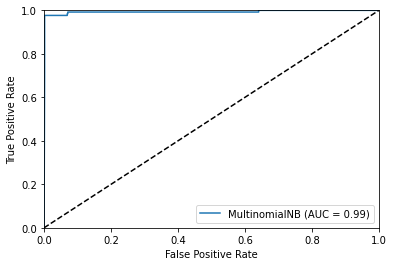

In [46]:
# PLOT ROC curve on testing set
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test_dt.toarray(), y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])

(0.0, 1.0)

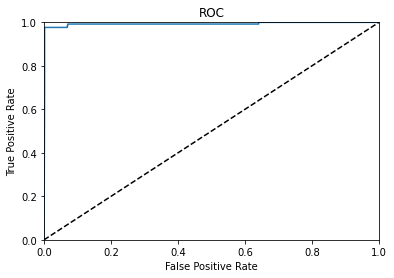

In [47]:
# ROC curve on Testing set
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob[:,1]) # pass label and prob
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])

**AUC (Area under the ROC Curve)**

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prob[:,1])

0.9929471095632201

**Cross-validated ROC curve**
* **cross_val_predict()**

AUC: 0.99


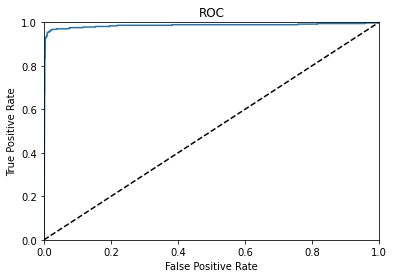

In [52]:
from sklearn.model_selection import cross_val_predict
y_prob_cv = cross_val_predict(model, X_train_dt.toarray(), y_train, cv=3, method='predict_proba')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_prob_cv[:, 1])

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])

from sklearn.metrics import roc_auc_score
auc_cv = roc_auc_score(y_train, y_prob_cv[:, 1])
print(f'AUC: {auc_cv:.2f}')

**Save the model**

In [53]:
import joblib
count_vectorizer_filename = 'vec.sav'
classifier_filename = 'spam_classifer.sav'
joblib.dump(vec, count_vectorizer_filename)
joblib.dump(model, classifier_filename)

['spam_classifer.sav']

**Load the model**

In [54]:
import joblib
count_vectorizer_filename = 'vec.sav'
classifier_filename = 'spam_classifer.sav'
vec = joblib.load(count_vectorizer_filename)
model = joblib.load(classifier_filename)

**Apply it on unseen data:**
* Convert & Predict using loaded vectorizer & model

In [56]:
# step 1 transform using the vectorizer
unknown_dt = vec.transform(['Hi, I will send you the documents later. Regards, Paul', 
                            'Call 1234-5678 on this awesome opportunity'])
# step 2 predict using the model
model.predict(unknown_dt.toarray())

array([0, 1], dtype=int64)